<a href="http://agrum.org" target="blank"><img src="http://agrum.gitlab.io/theme/img/logoAgrum.png" align="left" style="height:100px"/></a><a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This pyAgrum's notebook is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

In [1]:
import os

%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt


In [2]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
gnb.configuration()

# Credal Net from BN

In [3]:
bn=gum.fastBN("A->B[3]->C<-D<-A->E->F")
bn_min=gum.BayesNet(bn)
bn_max=gum.BayesNet(bn)
for n in bn.nodes():
  x=0.4*min(bn.cpt(n).min(),1-bn.cpt(n).max())
  bn_min.cpt(n).translate(-x)
  bn_max.cpt(n).translate(x)
    
cn=gum.CredalNet(bn_min,bn_max)
cn.intervalToCredal()

gnb.sideBySide(bn.cpt("B"),bn_min.cpt("B"),bn_max.cpt("B"))
cn

(gum::credal::CredalNet<double>@0000021E882DE0C0) 
A[0,1]
<> : [[0.378398 , 0.621602] , [0.733598 , 0.266402]]

B[0,2]
<A:0> : [[0.0288029 , 0.650159 , 0.321038] , [0.0288029 , 0.669362 , 0.301835] , [0.0480045 , 0.669362 , 0.282633] , [0.0672074 , 0.650159 , 0.282633] , [0.0480033 , 0.630958 , 0.321038] , [0.0672074 , 0.630958 , 0.301834]]
<A:1> : [[0.38256 , 0.0909572 , 0.526483] , [0.38256 , 0.110159 , 0.507281] , [0.401761 , 0.110159 , 0.48808] , [0.420962 , 0.0909575 , 0.48808] , [0.401761 , 0.0717557 , 0.526483] , [0.420962 , 0.0717557 , 0.507282]]

C[0,1]
<B:0|D:0> : [[0.442757 , 0.557243] , [0.531686 , 0.468314]]
<B:1|D:0> : [[0.35291 , 0.64709] , [0.44184 , 0.55816]]
<B:2|D:0> : [[0.78626 , 0.21374] , [0.875188 , 0.124812]]
<B:0|D:1> : [[0.349123 , 0.650877] , [0.438053 , 0.561947]]
<B:1|D:1> : [[0.408829 , 0.591171] , [0.497761 , 0.502239]]
<B:2|D:1> : [[0.0666982 , 0.933302] , [0.155626 , 0.844374]]

D[0,1]
<A:0> : [[0.734844 , 0.265156] , [0.746514 , 0.253486]]
<A:1> : [[0.00875099 , 0.991249] , [0.0204212 , 0.979579]]

E[0,1]
<A:0> : [[0.334838 , 0.665162] , [0.611714 , 0.388286]]
<A:1> : [[0.515467 , 0.484533] , [0.792342 , 0.207658]]

F[0,1]
<E:0> : [[0.609322 , 0.390678] , [0.832565 , 0.167435]]
<E:1> : [[0.296369 , 0.703631] , [0.519615 , 0.480385]]

#### We can use LBP on CN (L2U) only for binary credal networks (here B is not binary). We then propose the classical binarization (but warn the user that this leads to approximation in the inference)

In [6]:
cn2=gum.CredalNet(bn_min,bn_max)
cn2.intervalToCredal()
cn2.approximatedBinarization()
cn2.computeBinaryCPTMinMax()

gnb.sideBySide(cn,cn2)

Here, $B$ becomes 
- $B$-b$i$ : the $i$-th bit of B
- instrumental $B$-v$k$ : the indicator variable for each modality $k$ of $B$

In [7]:
ie_mc=gum.CNMonteCarloSampling(cn)
ie2_lbp=gum.CNLoopyPropagation(cn2)
ie2_mc=gum.CNMonteCarloSampling(cn2)

In [8]:
gnb.sideBySide(gnb.getInference(cn,ie_mc),gnb.getInference(cn2,ie2_mc),gnb.getInference(cn2,ie2_lbp))

In [10]:
gnb.sideBySide(ie_mc.CN(),ie_mc.marginalMin("F"),ie_mc.marginalMax("F"))
gnb.sideBySide(ie_mc.CN(),ie2_lbp.marginalMin("F"),ie2_lbp.marginalMax("F"))
print(cn)


A[0,1]
<> : [[0.378398 , 0.621602] , [0.733598 , 0.266402]]

B[0,2]
<A:0> : [[0.0288029 , 0.650159 , 0.321038] , [0.0288029 , 0.669362 , 0.301835] , [0.0480045 , 0.669362 , 0.282633] , [0.0672074 , 0.650159 , 0.282633] , [0.0480033 , 0.630958 , 0.321038] , [0.0672074 , 0.630958 , 0.301834]]
<A:1> : [[0.38256 , 0.0909572 , 0.526483] , [0.38256 , 0.110159 , 0.507281] , [0.401761 , 0.110159 , 0.48808] , [0.420962 , 0.0909575 , 0.48808] , [0.401761 , 0.0717557 , 0.526483] , [0.420962 , 0.0717557 , 0.507282]]

C[0,1]
<B:0|D:0> : [[0.442757 , 0.557243] , [0.531686 , 0.468314]]
<B:1|D:0> : [[0.35291 , 0.64709] , [0.44184 , 0.55816]]
<B:2|D:0> : [[0.78626 , 0.21374] , [0.875188 , 0.124812]]
<B:0|D:1> : [[0.349123 , 0.650877] , [0.438053 , 0.561947]]
<B:1|D:1> : [[0.408829 , 0.591171] , [0.497761 , 0.502239]]
<B:2|D:1> : [[0.0666982 , 0.933302] , [0.155626 , 0.844374]]

D[0,1]
<A:0> : [[0.734844 , 0.265156] , [0.746514 , 0.253486]]
<A:1> : [[0.00875099 , 0.991249] , [0.0204212 , 0.979579]]

E[

## Credal Net from bif files

In [9]:
cn=gum.CredalNet(os.path.join("res","cn/2Umin.bif"),os.path.join("res","cn/2Umax.bif"))
cn.intervalToCredal()

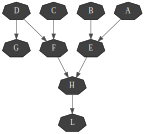

In [10]:
gnb.showCN(cn,"2")

In [11]:
ie=gum.CNMonteCarloSampling(cn)
ie.insertEvidenceFile(os.path.join("res","cn/L2U.evi"))

In [12]:
ie.setRepetitiveInd(False)
ie.setMaxTime(1)
ie.setMaxIter(1000)

ie.makeInference()

In [13]:
gnb.sideBySide(cn,gnb.getInference(cn,targets={"A","H","L","D"},engine=ie,evs={"L":[0,1],"G":[1,0]}))

# Comparing inference in credal networks

In [15]:
import pyAgrum as gum

def showDiffInference(model,mc,lbp):
    for i in model.current_bn().nodes():
        a,b=mc.marginalMin(i)[:]
        c,d=mc.marginalMax(i)[:]
        
        e,f=lbp.marginalMin(i)[:]
        g,h=lbp.marginalMax(i)[:]
        
        plt.scatter([a,b,c,d],[e,f,g,h])
        

cn=gum.CredalNet("res/cn/2Umin.bif","res/cn/2Umax.bif")
cn.intervalToCredal()

#### The two inference give quite the same result

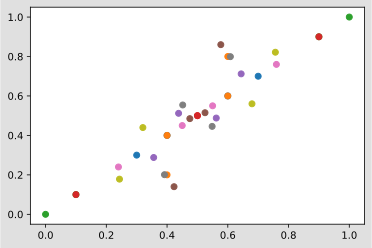

In [17]:
ie_mc=gum.CNMonteCarloSampling(cn)
ie_mc.makeInference()

cn.computeBinaryCPTMinMax()
ie_lbp=gum.CNLoopyPropagation(cn)
ie_lbp.makeInference()

showDiffInference(cn,ie_mc,ie_lbp)

#### but not when evidence are inserted

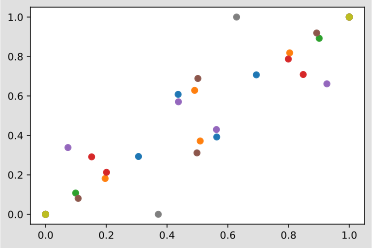

In [18]:
ie_mc=gum.CNMonteCarloSampling(cn)
ie_mc.insertEvidenceFile("res/cn/L2U.evi")
ie_mc.makeInference()

ie_lbp=gum.CNLoopyPropagation(cn)
ie_lbp.insertEvidenceFile("res/cn/L2U.evi")
ie_lbp.makeInference()

showDiffInference(cn,ie_mc,ie_lbp)


## Dynamical Credal Net

In [19]:
cn=gum.CredalNet(os.path.join("res","cn/bn_c_8.bif"),os.path.join("res","cn/den_c_8.bif"))
cn.bnToCredal(0.8,False)

In [20]:
ie=gum.CNMonteCarloSampling(cn)
ie.insertModalsFile(os.path.join("res","cn/modalities.modal"))

ie.setRepetitiveInd(True)
ie.setMaxTime(30)
ie.setMaxIter(1000)

ie.makeInference()

In [21]:
print(ie.dynamicExpMax("temp"))

(13.796595325898947, 11.391276171798012, 11.880707481299204, 11.845957195973266, 11.832343590421114, 11.838440247998115, 11.837182337197266, 11.83727595089036, 11.837309606952806)


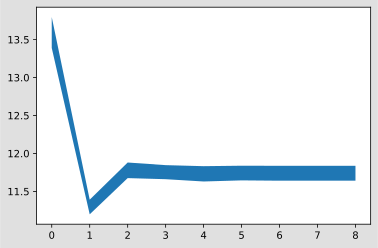

In [22]:
fig=figure()
ax=fig.add_subplot(111)
ax.fill_between(range(9),ie.dynamicExpMax("temp"),ie.dynamicExpMin("temp"))

In [23]:
ie=gum.CNMonteCarloSampling(cn)
ie.insertModalsFile(os.path.join("res","cn/modalities.modal"))

ie.setRepetitiveInd(False)
ie.setMaxTime(30)
ie.setMaxIter(1000)

ie.makeInference()


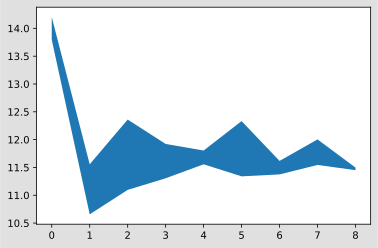

In [24]:
fig=figure()
ax=fig.add_subplot(111)
ax.fill_between(range(9),ie.dynamicExpMax("temp"),ie.dynamicExpMin("temp"))

stopped with epsilon=0


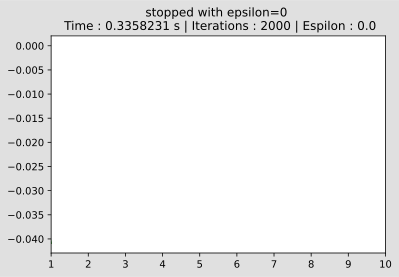

In [25]:
ie=gum.CNMonteCarloSampling(cn)
ie.insertModalsFile(os.path.join("res","cn/modalities.modal"))

ie.setRepetitiveInd(False)
ie.setMaxTime(30)
ie.setMaxIter(5000)

gnb.animApproximationScheme(ie)
ie.makeInference()
print(ie.messageApproximationScheme())

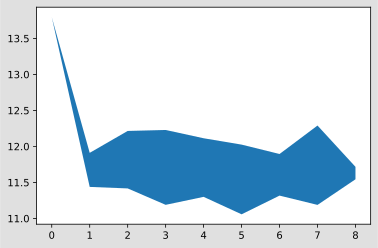

In [26]:
fig=figure()
ax=fig.add_subplot(111)
ax.fill_between(range(9),ie.dynamicExpMax("temp"),ie.dynamicExpMin("temp"));